# Comparison of AB Testing and Bidding Methods Transformation
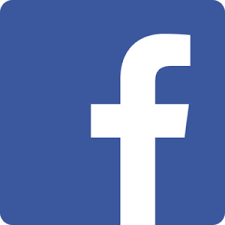

***Facebook introduced a new bid type called “average bidding” a long time ago as an alternative to the existing bidding type called “maximum bidding”. One of our clients x.com decided to test this new feature and wanted to do an A/B test to see if average bidding would bring more conversions than maximum bidding. The A/B test has been running for 1 month and x.com now expects you to analyze the results of this A/B test. The ultimate success metric for x.com is Purchase. Therefore, for statistical tests, the focus should be on Purchasemetrics.***

#####################################################
## Data Set
#####################################################

***This dataset, which includes information about a company's website, includes information such as the number of ads users have seen and clicked, as well as the earnings information from there. There are two separate datasets: Control and Test groups. These datasets are located on separate pages of the ab_testing.xlsx excel. Maximum Bidding was applied to the control group, and Average Bidding was applied to the test group.***

***impression: Number of ad views***

***Click: Number of clicks on the viewed ad***

***Purchase: Number of products purchased after clicked ads***

***Earning: Earnings obtained after purchased products***

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

dataframe_control = pd.read_excel("ab_testing.xlsx" , sheet_name="Control Group")
dataframe_test = pd.read_excel("ab_testing.xlsx" , sheet_name="Test Group")

df_control = dataframe_control.copy()
df_test = dataframe_test.copy()

In [3]:
df_control["group"] = "control"
df_test["group"] = "test"

df = pd.concat([df_control,df_test], axis=0,ignore_index=False)
df.head()
df.tail()

,Impression,Click,Purchase,Earning,group
35,79234.91193,6002.21358,382.04712,2277.86398,test
36,130702.23941,3626.32007,449.82459,2530.84133,test
37,116481.87337,4702.78247,472.45373,2597.91763,test
38,79033.83492,4495.42818,425.35910,2595.85788,test
39,102257.45409,4800.06832,521.31073,2967.51839,test


## Defining the Hypothesis of A/B Testing

***Hypothesis is defined.***

***H0: M1 = M2 (There is no difference between the control group and test group purchase averages.)***

***H1: M1!= M2 (There is a difference between the control group and test group purchase averages.)***

In [5]:
df.groupby("group").agg({"Purchase": "mean"})

,Purchase
group,
control,550.89406
test,582.10610


### Conducting Hypothesis Testing
***Before performing hypothesis testing, assumption checks are performed. These are Normality Assumption and Variance Homogeneity.***

***Whether the control and test groups comply with the normality assumption is tested separately via the Purchase variable***

***Normality Assumption:***

***H0: Normal distribution assumption is provided.***

***H1: Normal distribution assumption is not provided***

***p < 0.05 H0 REJECTED***

***p > 0.05 H0 CANNOT BE REJECTED***

***According to the test result, is the normality assumption provided for the control and test groups?***

***We interpret the obtained p-value values.***

In [6]:
test_stat, pvalue = shapiro(df.loc[df["group"] == "control", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


***p-value=0.5891***

***HO cannot be rejected. The values ​​of the control group provide the normal distribution assumption.***

***Variance Homogeneity:***

***H0: Variances are homogeneous.***

***H1: Variances are not homogeneous.***

***p < 0.05 H0 REJECT***

***p > 0.05 H0 CANNOT BE REJECTED***

***We test whether variance homogeneity is provided for the control and test groups through the Purchase variable.***

***Is the normality assumption provided according to the test result? We interpret the p-value values ​​obtained.***

In [7]:
test_stat, pvalue = levene(df.loc[df["group"] == "control", "Purchase"],
                           df.loc[df["group"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


***p-value=0.1083***

***HO cannot be rejected. The values ​​of the Control and Test groups provide the assumption of variance homogeneity.***

***Variances are Homogeneous.***

***NEXT: We select the appropriate test according to the results of the Normality Assumption and Variance Homogeneity***

***Since the assumptions are met, an independent two-sample t-test (parametric test) is performed.***

***H0: M1 = M2 (There is no statistically significant difference between the purchase averages of the control group and the test group.)***

***H1: M1 != M2 (There is a statistically significant difference between the purchase averages of the control group and the test group)***

***p<0.05 HO REJECTED , p>0.05 HO CANNOT BE REJECTED***

In [8]:
test_stat, pvalue = ttest_ind(df.loc[df["group"] == "control", "Purchase"],
                              df.loc[df["group"] == "test", "Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


***NEXT: Considering the p_value obtained as a result of the test, we comment on whether there is a statistically significant difference between the control and test group purchase averages.***

***p-value=0.3493***

### HO cannot be rejected. There is no statistically significant difference between the control and test group purchase averages.